In [96]:
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,Input, UpSampling2D
import os
import numpy as np
import shutil
from tensorflow.keras.layers import Dense

# Pre-Processing

In [ ]:
root_dir = '/kaggle/input/georgebush-face/George_W_Bush/'

os.makedirs('/kaggle/working/train')
os.makedirs('/kaggle/working/val')
os.makedirs('/kaggle/working/test')

src = root_dir

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.90)])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "/kaggle/working/train")

for name in val_FileNames:
    shutil.copy(name, "/kaggle/working/val")

for name in test_FileNames:
    shutil.copy(name, "/kaggle/working/test")

In [97]:
train_vector = []
for i in glob.glob('/kaggle/working/train/*.jpg'):
    img = cv2.imread(i)
    img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA).sum(axis=2)
    img = img/img.max()
    train_vector.append(img.reshape(-1))
     
train_vector = np.array(train_vector)
print('Train_data Vector Shape :{}'.format(train_vector.shape))



test_vector = []
for i in glob.glob('/kaggle/working/test/*.jpg'):
    img = cv2.imread(i)
    img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA).sum(axis=2)
    img = img/img.max()
    test_vector.append(img.reshape(-1))
     
test_vector = np.array(test_vector)
print()
print('Test_data Vector Shape :{}'.format(test_vector.shape))




val_vector = []
for i in glob.glob('/kaggle/working/val/*.jpg'):
    img = cv2.imread(i)
    img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA).sum(axis=2)
    img = img/img.max()
    val_vector.append(img.reshape(-1))
     
val_vector = np.array(val_vector)
print()
print('Validation_data Vector Shape :{}'.format(val_vector.shape))

    

Train_data Vector Shape :(371, 16384)

Test_data Vector Shape :(53, 16384)

Validation_data Vector Shape :(106, 16384)


# PCA

### Fitting / Training


In [98]:
pca = PCA()

Priciple Components:160
Number of components explaining 95% variance: 160


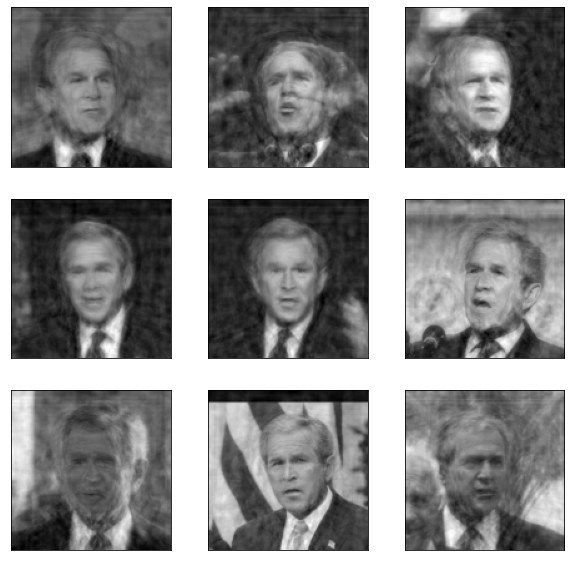

<Figure size 432x288 with 0 Axes>

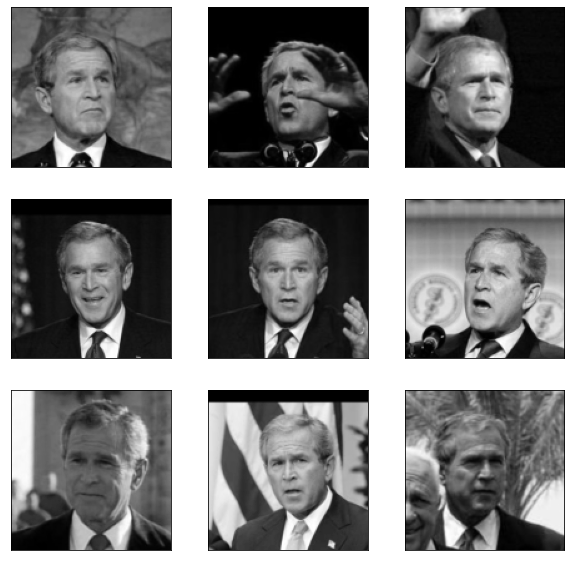

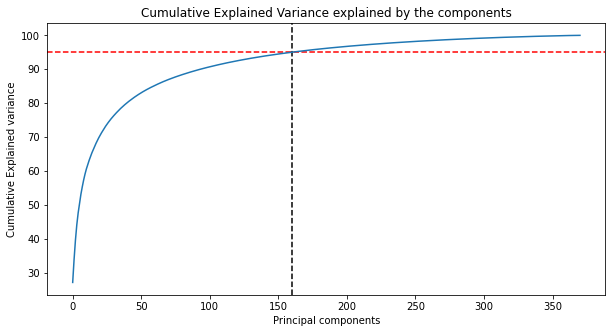

In [99]:
pca.fit(train_vector)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Priciple Components:{}".format(k))

ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(train_vector))

plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[1].max()*255)*image_recon[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[2].max()*255)*image_recon[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[3].max()*255)*image_recon[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[4].max()*255)*image_recon[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[5].max()*255)*image_recon[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[6].max()*255)*image_recon[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[7].max()*255)*image_recon[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[8].max()*255)*image_recon[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[9].max()*255)*image_recon[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_PCA_train.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[1].max()*255)*train_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[2].max()*255)*train_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[3].max()*255)*train_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[4].max()*255)*train_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[5].max()*255)*train_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[6].max()*255)*train_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[7].max()*255)*train_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[8].max()*255)*train_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((train_vector[9].max()*255)*train_vector[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Org_PCA_train.png')

k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.savefig('/kaggle/working/k_variance_Train.png')


### Test

Number of components explaining 95% variance: 38


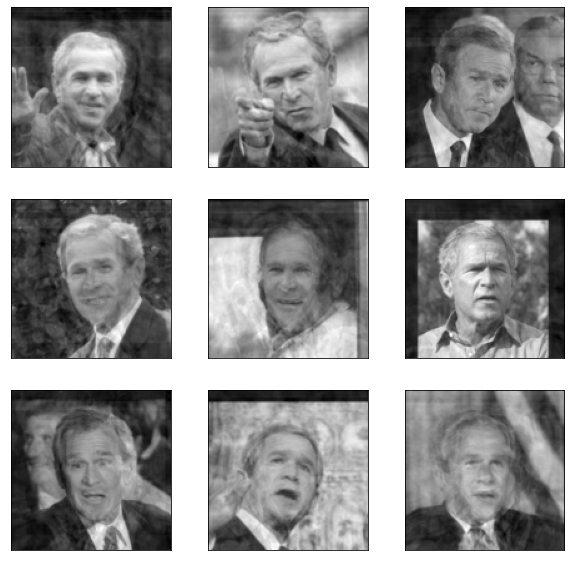

<Figure size 432x288 with 0 Axes>

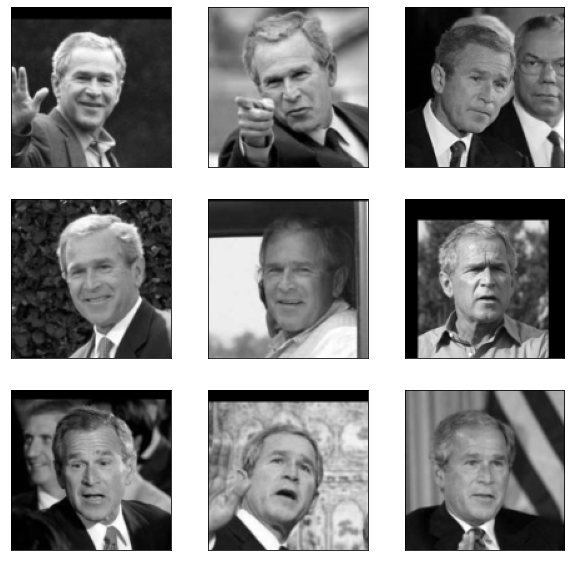

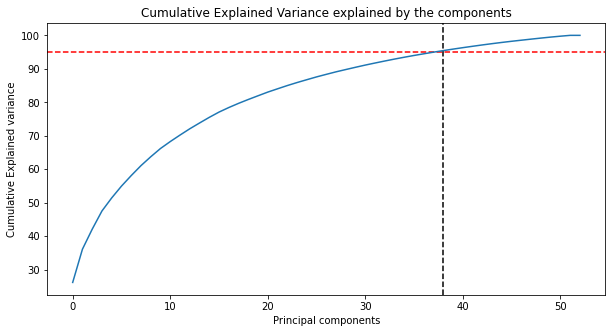

In [101]:
pca.fit(test_vector)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(test_vector))

plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[1].max()*255)*image_recon[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[2].max()*255)*image_recon[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[3].max()*255)*image_recon[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[4].max()*255)*image_recon[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[5].max()*255)*image_recon[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[6].max()*255)*image_recon[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[7].max()*255)*image_recon[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[8].max()*255)*image_recon[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[9].max()*255)*image_recon[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_PCA_test.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[1].max()*255)*test_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[2].max()*255)*test_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[3].max()*255)*test_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[4].max()*255)*test_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[5].max()*255)*test_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[6].max()*255)*test_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[7].max()*255)*test_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[8].max()*255)*test_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[9].max()*255)*test_vector[9].reshape((128,128)))
plt.gray()
plt.savefig('/kaggle/working/Bush_Org_PCA_test.png')


k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.savefig('/kaggle/working/k_variance_Test.png')



Number of components explaining 95% variance: 66


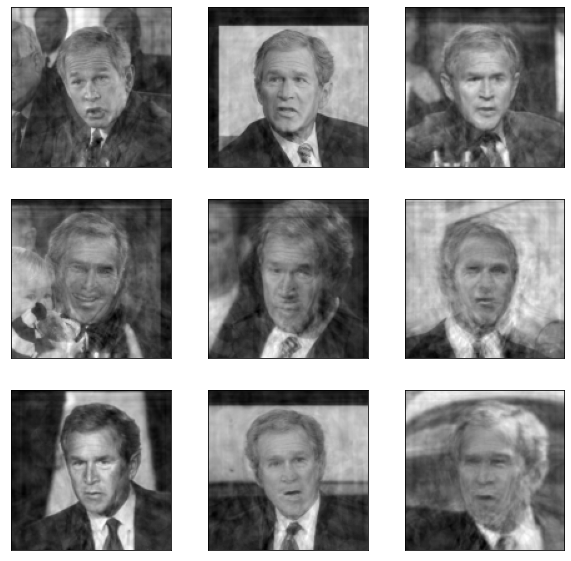

<Figure size 432x288 with 0 Axes>

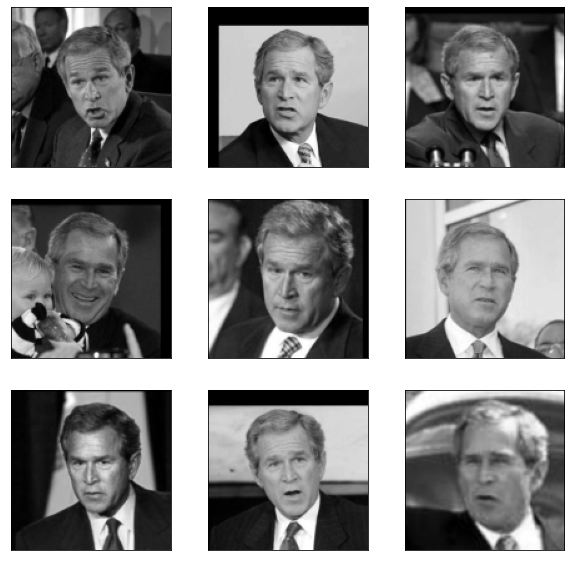

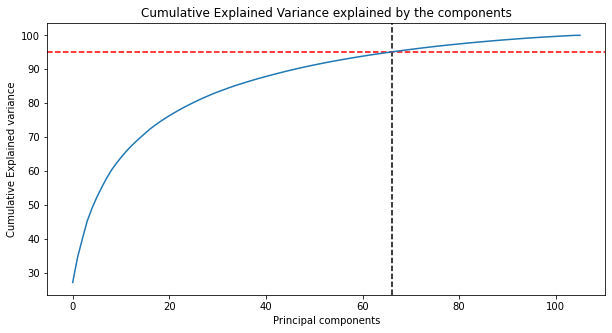

In [102]:
pca.fit(val_vector)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(val_vector))

plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[1].max()*255)*image_recon[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[2].max()*255)*image_recon[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[3].max()*255)*image_recon[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[4].max()*255)*image_recon[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[5].max()*255)*image_recon[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[6].max()*255)*image_recon[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[7].max()*255)*image_recon[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[8].max()*255)*image_recon[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[9].max()*255)*image_recon[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_PCA_val.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[1].max()*255)*val_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[2].max()*255)*val_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[3].max()*255)*val_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[4].max()*255)*val_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[5].max()*255)*val_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[6].max()*255)*val_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[7].max()*255)*val_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[8].max()*255)*val_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((val_vector[9].max()*255)*val_vector[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Org_PCA_val.png')


k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.savefig('/kaggle/working/k_variance_val.png')



## k_new = 20

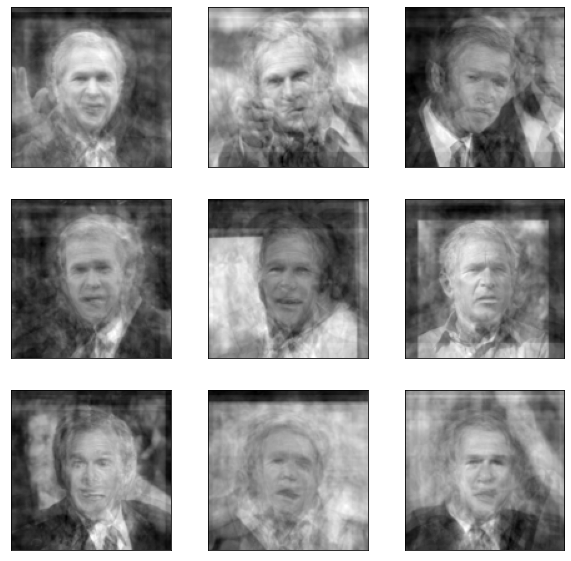

<Figure size 432x288 with 0 Axes>

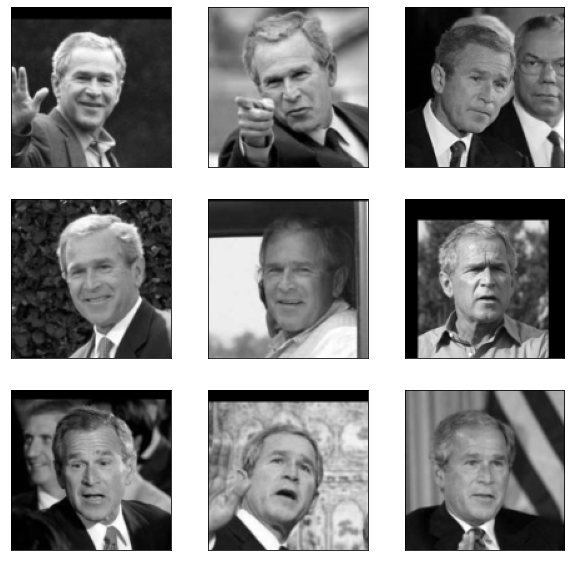

In [103]:
pca.fit(test_vector)

ipca = IncrementalPCA(n_components=20)
image_recon = ipca.inverse_transform(ipca.fit_transform(test_vector))

plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[1].max()*255)*image_recon[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[2].max()*255)*image_recon[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[3].max()*255)*image_recon[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[4].max()*255)*image_recon[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[5].max()*255)*image_recon[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[6].max()*255)*image_recon[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[7].max()*255)*image_recon[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[8].max()*255)*image_recon[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[9].max()*255)*image_recon[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_PCA_test_k20.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[1].max()*255)*test_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[2].max()*255)*test_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[3].max()*255)*test_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[4].max()*255)*test_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[5].max()*255)*test_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[6].max()*255)*test_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[7].max()*255)*test_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[8].max()*255)*test_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])

plt.gray()
plt.imshow((test_vector[9].max()*255)*test_vector[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Org_PCA_test_k20.png')


# k_new = 45

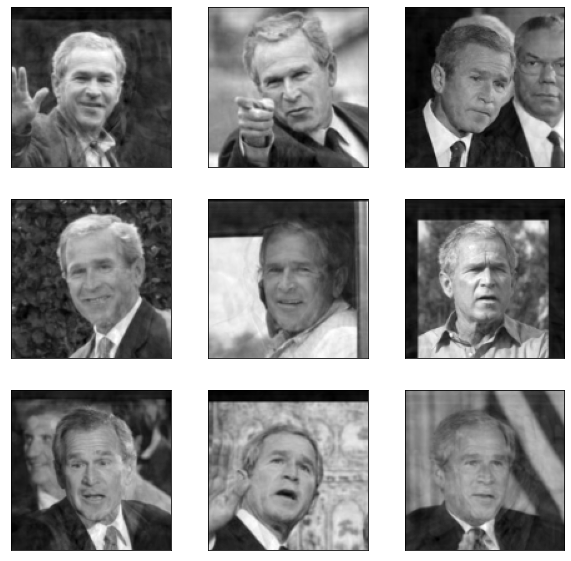

<Figure size 432x288 with 0 Axes>

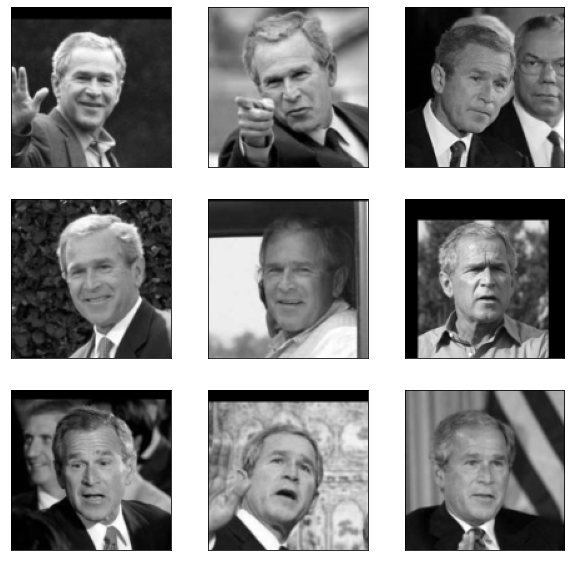

In [104]:
pca.fit(test_vector)

ipca = IncrementalPCA(n_components=45)
image_recon = ipca.inverse_transform(ipca.fit_transform(test_vector))

plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[1].max()*255)*image_recon[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[2].max()*255)*image_recon[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[3].max()*255)*image_recon[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[4].max()*255)*image_recon[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[5].max()*255)*image_recon[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[6].max()*255)*image_recon[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[7].max()*255)*image_recon[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[8].max()*255)*image_recon[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((image_recon[9].max()*255)*image_recon[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_PCA_test_k50.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[1].max()*255)*test_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[2].max()*255)*test_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[3].max()*255)*test_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[4].max()*255)*test_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[5].max()*255)*test_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[6].max()*255)*test_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[7].max()*255)*test_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[8].max()*255)*test_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[9].max()*255)*test_vector[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Org_PCA_test_k50.png')


In [105]:
from sklearn.metrics import mean_squared_error

print("Error(Mean Squared Error) for reconstruction | PCA")
print()
test_k50 = cv2.imread('Bush_Recon_PCA_test_k50.png')
test_org = cv2.imread('Bush_Org_PCA_test_k50.png')
print("Error(MSE) | PCA | k = 50 : {}".format(mean_squared_error(test_k50.reshape(-1), test_org.reshape(-1)).round(2)))

test_k20 = cv2.imread('Bush_Recon_PCA_test_k20.png')
print("Error(MSE) | PCA | k = 20 : {}".format(mean_squared_error(test_k20.reshape(-1), test_org.reshape(-1)).round(2)))

test_korg = cv2.imread('Bush_Recon_PCA_test.png')
print("Error(MSE) | PCA | k = 36 : {}".format(mean_squared_error(test_korg.reshape(-1), test_org.reshape(-1)).round(2)))

Error(Mean Squared Error) for reconstruction | PCA

Error(MSE) | PCA | k = 50 : 32.4
Error(MSE) | PCA | k = 20 : 45.47
Error(MSE) | PCA | k = 36 : 40.99


## Encoder

In [106]:
np.random.seed(43)

#encoder
input_image = Input(shape=(128, 128, 1))
x = Conv2D(64, (3, 3), activation='relu', padding="same")(input_image)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

#hidden Layer
y = Dense(120)(encoded)

#decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(y)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3),activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(inputs=input_image, outputs=decoded)
encoder = Model(inputs=input_image, outputs=encoded)

autoencoder.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=1e-3, amsgrad=True), loss='mse', metrics=['accuracy'])

autoencoder.summary()
encoder.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dense_10 (Dense)             (None, 32, 32, 120)       3960      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 32)        345

In [ ]:
history_record = autoencoder.fit(train_vector.reshape((train_vector.shape[0],128,128,1)), train_vector.reshape((train_vector.shape[0],128,128,1)), epochs=25, batch_size=15, shuffle=True,validation_data=(val_vector.reshape((val_vector.shape[0],128,128,1)), val_vector.reshape((val_vector.shape[0],128,128,1))) )

In [ ]:
decode_images = autoencoder.predict(test_vector.reshape((test_vector.shape[0],128,128,1)))

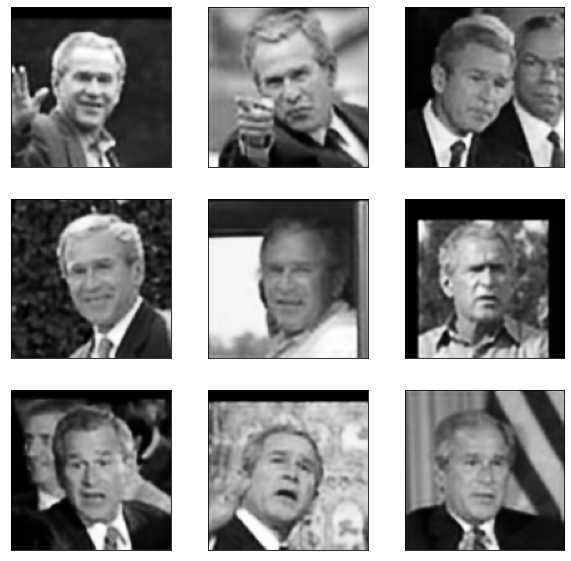

<Figure size 432x288 with 0 Axes>

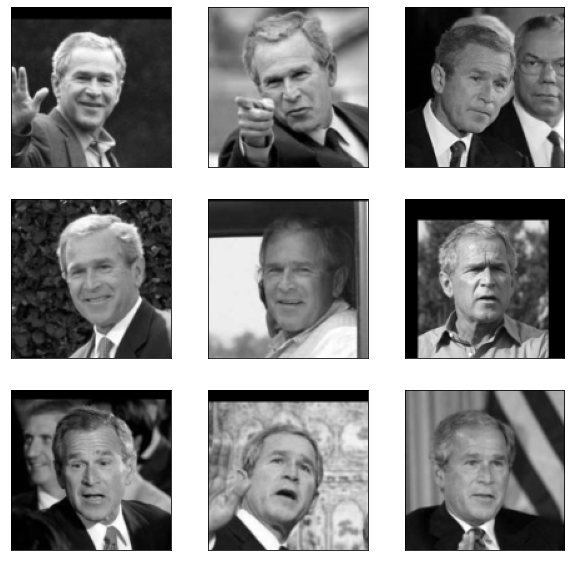

In [107]:
plt.figure(figsize=(10,10))
plt.figure(1)


plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[1].max()*255)*decode_images[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[2].max()*255)*decode_images[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[3].max()*255)*decode_images[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[4].max()*255)*decode_images[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[5].max()*255)*decode_images[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[6].max()*255)*decode_images[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[7].max()*255)*decode_images[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[8].max()*255)*decode_images[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((decode_images[9].max()*255)*decode_images[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Recon_AE_test.png')


plt.figure(2)
plt.figure(figsize=(10,10))

plt.subplot(331)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[1].max()*255)*test_vector[1].reshape((128,128)))

plt.subplot(332)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[2].max()*255)*test_vector[2].reshape((128,128)))

plt.subplot(333)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[3].max()*255)*test_vector[3].reshape((128,128)))

plt.subplot(334)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[4].max()*255)*test_vector[4].reshape((128,128)))

plt.subplot(335)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[5].max()*255)*test_vector[5].reshape((128,128)))

plt.subplot(336)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[6].max()*255)*test_vector[6].reshape((128,128)))

plt.subplot(337)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[7].max()*255)*test_vector[7].reshape((128,128)))

plt.subplot(338)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[8].max()*255)*test_vector[8].reshape((128,128)))

plt.subplot(339)
plt.xticks([])
plt.yticks([])
plt.imshow((test_vector[9].max()*255)*test_vector[9].reshape((128,128)))
plt.gray()

plt.savefig('/kaggle/working/Bush_Org_AE_test.png')

In [ ]:
print("Error(Mean Squared Error) for reconstruction | AutoEncoder")
print()
test_ae = cv2.imread('Bush_Recon_AE_test.png')
test_org = cv2.imread('Bush_Org_AE_test.png')
print("Error(MSE) | Autoencoder : {}".format(mean_squared_error(test_ae.reshape(-1), test_org.reshape(-1)).round(2)))